<a href="https://colab.research.google.com/github/amohsin87/Python_Tutorials/blob/master/V2_Extension_CSV_FIX__IoT_Child_Women_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

In [20]:
#Load Data
df=pd.read_csv("23-year-old TEMP_HUMIDITY_GSR DAY 1-14.csv")#you need to change file name for selected csv file
#df=pd.read_csv("23-year-old D1-14-data.csv")
#df=pd.read_csv("23-year-old TEMP_HUMIDITY_GSR DAY 1-14.csv")



In [21]:
df.head(10)

,created_at,entry_id,GSR(Stress),Temp,Humidity
0,2021-11-02 22:10:52 +06,1,484,27.6,0.0
1,2021-11-02 22:11:08 +06,2,404,27.8,86.3
2,2021-11-02 22:11:24 +06,3,518,28.2,91.6
3,2021-11-02 22:11:40 +06,4,444,28.4,92.1
4,2021-11-02 22:11:55 +06,5,443,28.5,93.0
5,2021-11-02 22:12:11 +06,6,442,28.6,92.3
6,2021-11-02 22:12:27 +06,7,433,28.7,91.9
7,2021-11-02 22:12:43 +06,8,439,28.7,90.9
8,2021-11-02 22:12:59 +06,9,427,28.7,91.0
9,2021-11-02 22:13:15 +06,10,479,28.7,91.4


In [22]:
df.tail(10)


,created_at,entry_id,GSR(Stress),Temp,Humidity
408,2021-12-23T22:57:09+06:00,21,579,27.6,90.0
409,2021-12-23T22:57:25+06:00,22,526,27.5,89.3
410,2021-12-23T22:57:40+06:00,23,527,27.5,89.0
411,2021-12-23T22:57:56+06:00,24,528,27.5,89.0
412,2021-12-23T22:58:12+06:00,25,527,27.5,89.1
413,2021-12-23T22:58:28+06:00,26,386,27.4,89.8
414,2021-12-23T22:58:43+06:00,27,387,27.4,89.0
415,2021-12-23T22:58:59+06:00,28,383,27.3,88.3
416,2021-12-23T22:59:15+06:00,29,382,27.3,88.6
417,2021-12-23T22:59:30+06:00,30,381,27.2,88.0


In [24]:
import pandas as pd


def remove_timezone_label(data):

    pos = data.index('+')

    # Slice data to get rid of the tz, then strip leading/trailing whitespace
    data = (data[:pos]).strip()

    return data


if __name__ == '__main__':

    file_loc = "23-year-old TEMP_HUMIDITY_GSR DAY 1-14.csv"

    df = pd.read_csv(file_loc)

    # the apply() function is used to carry out a function on the data.
    df["created_at"] = df["created_at"].apply(remove_timezone_label)

    df.to_csv("23-year-old D1-14-data.csv", index=False)

In [25]:
df = df.drop(['entry_id'], axis=1)

#df = df.drop(['GSR(Stress)'], axis=1)
df = df.drop(['Temp'], axis=1)
df = df.drop(['Humidity'], axis=1)


df.head()

,created_at,GSR(Stress)
0,2021-11-02 22:10:52,484
1,2021-11-02 22:11:08,404
2,2021-11-02 22:11:24,518
3,2021-11-02 22:11:40,444
4,2021-11-02 22:11:55,443


In [ ]:
# Extract all Data Like Year MOnth Day Time etc
#dataset = df
#dataset["Month"] = pd.to_datetime(df["Timeline"]).dt.month
#dataset["Year"] = pd.to_datetime(df["Timeline"]).dt.year
#dataset["Date"] = pd.to_datetime(df["Date"]).dt.date
#dataset["Time"] = pd.to_datetime(df["Timeline"]).dt.time
#dataset["Week"] = pd.to_datetime(df["Date"]).dt.week
#dataset["Day"] = pd.to_datetime(df["Date"]).dt.day_name()
#dataset = df.set_index("Timeline")
#dataset.index = pd.to_datetime(dataset.index)
#dataset
#dataset.head(5)

In [ ]:
#df = df.drop(['Timeline'], axis=1)
#df = df.drop(['alarm'], axis=1)
#df = df.drop(['cng'], axis=1)
#df.head()

In [ ]:
#sns.lineplot(x=df.index, y="temp", data=df);
#sns.lineplot(x=df.index, y="Time", data=df);
#sns.lineplot(x=Time, y="temp", data=df);

In [ ]:
#df = df.drop(['Timeline'], axis=1)
#df = df.drop(['Month'], axis=1)
#df = df.drop(['Year'], axis=1)
#df = df.drop(['co'], axis=1)



df.head()

In [26]:
df.tail()

,created_at,GSR(Stress)
413,2021-12-23T22:58:28,386
414,2021-12-23T22:58:43,387
415,2021-12-23T22:58:59,383
416,2021-12-23T22:59:15,382
417,2021-12-23T22:59:30,381


In [27]:
df.isnull().sum()

created_at     0
GSR(Stress)    0
dtype: int64

In [28]:
df.shape

(418, 2)

In [ ]:
#conversion_rate = 85.33
#df['price'] = conversion_rate * df['price']
#df.head()

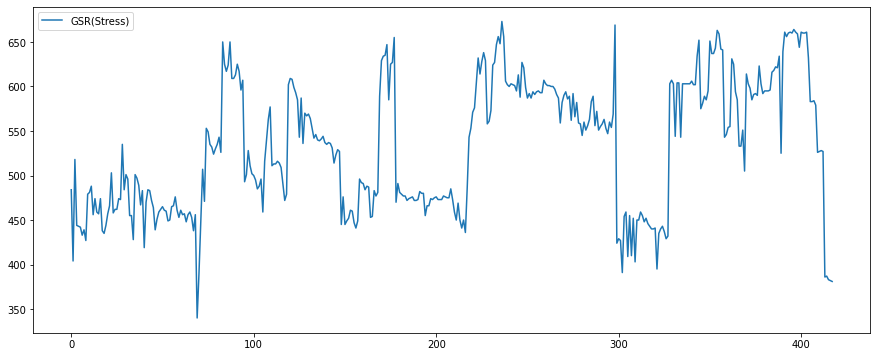

In [29]:
df.plot(figsize=(15, 6))
plt.show()

In [30]:
df.columns = ['ds', 'y'] #required by fbprophet
df.head()

,ds,y
0,2021-11-02 22:10:52,484
1,2021-11-02 22:11:08,404
2,2021-11-02 22:11:24,518
3,2021-11-02 22:11:40,444
4,2021-11-02 22:11:55,443


In [31]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2021-11-02 22:10:52,484
1,2021-11-02 22:11:08,404
2,2021-11-02 22:11:24,518
3,2021-11-02 22:11:40,444
4,2021-11-02 22:11:55,443


In [32]:
df = df.sort_values(by='ds')
df

,ds,y
0,2021-11-02 22:10:52,484
1,2021-11-02 22:11:08,404
2,2021-11-02 22:11:24,518
3,2021-11-02 22:11:40,444
4,2021-11-02 22:11:55,443
...,...,...
413,2021-12-23 22:58:28,386
414,2021-12-23 22:58:43,387
415,2021-12-23 22:58:59,383
416,2021-12-23 22:59:15,382


In [33]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [34]:
model = Prophet()

In [35]:
df.columns

Index(['ds', 'y'], dtype='object')

In [36]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [37]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [38]:
df.tail()

,ds,y
413,2021-12-23 22:58:28,386
414,2021-12-23 22:58:43,387
415,2021-12-23 22:58:59,383
416,2021-12-23 22:59:15,382
417,2021-12-23 22:59:30,381


In [39]:
future_dates = model.make_future_dataframe(periods=180)

In [40]:
future_dates.tail()

,ds
593,2022-06-17 22:59:30
594,2022-06-18 22:59:30
595,2022-06-19 22:59:30
596,2022-06-20 22:59:30
597,2022-06-21 22:59:30


In [41]:
pred = model.predict(future_dates)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-02 22:10:52,796.226190,423.204781,543.844242,796.226190,796.226190,-311.893440,-311.893440,-311.893440,-227.843968,-227.843968,-227.843968,-84.049472,-84.049472,-84.049472,0.0,0.0,0.0,484.332750
1,2021-11-02 22:11:08,796.226749,422.262543,539.295499,796.226749,796.226749,-313.083939,-313.083939,-313.083939,-228.740364,-228.740364,-228.740364,-84.343575,-84.343575,-84.343575,0.0,0.0,0.0,483.142810
2,2021-11-02 22:11:24,796.227308,420.627833,536.349886,796.227308,796.227308,-314.276086,-314.276086,-314.276086,-229.638403,-229.638403,-229.638403,-84.637683,-84.637683,-84.637683,0.0,0.0,0.0,481.951222
3,2021-11-02 22:11:40,796.227867,420.038709,539.150525,796.227867,796.227867,-315.469865,-315.469865,-315.469865,-230.538070,-230.538070,-230.538070,-84.931795,-84.931795,-84.931795,0.0,0.0,0.0,480.758001
4,2021-11-02 22:11:55,796.228391,417.040953,539.357434,796.228391,796.228391,-316.590500,-316.590500,-316.590500,-231.382971,-231.382971,-231.382971,-85.207529,-85.207529,-85.207529,0.0,0.0,0.0,479.637890


In [42]:
pred = pred[['ds', 'yhat']]
pred

,ds,yhat
0,2021-11-02 22:10:52,484.332750
1,2021-11-02 22:11:08,483.142810
2,2021-11-02 22:11:24,481.951222
3,2021-11-02 22:11:40,480.758001
4,2021-11-02 22:11:55,479.637890
...,...,...
593,2022-06-17 22:59:30,1178.182890
594,2022-06-18 22:59:30,2730.911749
595,2022-06-19 22:59:30,-115.072387
596,2022-06-20 22:59:30,972.474090


In [43]:
#model.plot(pred)
#model.plot(df.columns) 

In [ ]:
#model.plot_components(pred)

In [44]:
from fbprophet.diagnostics import cross_validation
#df_cv = cross_validation(model, initial='80 min', period='45 min', horizon='9 min')
#df_cv = cross_validation(model, initial=' 14 day', period='7 day ', horizon='14 day')
#df_cv = cross_validation(model, initial='150 min', period='90 min', horizon='150 min')
#df_cv = cross_validation(model, initial='20 min', period='15 min', horizon='30 min')
#df_cv = cross_validation(model, initial='20 min', period='60 min', horizon= '30 min')#mq4 home
df_cv = cross_validation(model, initial='60 min', period='30 min', horizon= '5 min')#Flame
#df_cv = cross_validation(model, initial='90 min', period='60 min', horizon= '30 min')
#df_cv = cross_validation(model, initial='365 days', period='90 days', horizon='180 days')
df_cv.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 2021-11-07 12:09:31 and 2021-12-23 22:54:30


  0%|          | 0/13 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-11-07 12:09:47,450.389227,419.459742,481.720563,465,2021-11-07 12:09:31
1,2021-11-07 12:10:02,448.266804,417.166429,477.429951,461,2021-11-07 12:09:31
2,2021-11-07 12:10:19,445.860619,415.632101,477.544060,460,2021-11-07 12:09:31
3,2021-11-07 12:10:35,443.595245,411.660419,473.682473,449,2021-11-07 12:09:31
4,2021-11-07 12:10:52,441.187533,412.513843,471.649011,450,2021-11-07 12:09:31


In [45]:


from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 00:00:31,1800.501320,42.432315,28.071474,0.050989,0.025062,0.826087
1,0 days 00:00:32,1996.273828,44.679680,29.082079,0.052476,0.025062,0.826087
2,0 days 00:00:34,1993.766057,44.651608,29.342394,0.052884,0.027749,0.826087
3,0 days 00:00:35,1967.764739,44.359494,28.835106,0.052097,0.027621,0.826087
4,0 days 00:00:36,1975.701511,44.448864,29.084801,0.052549,0.027749,0.826087


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


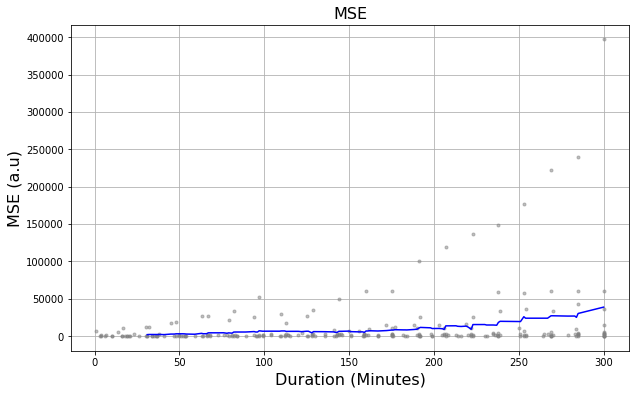

In [46]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

#sns.distplot(df["demand"])
#plt.title("Load Consumption")
#plt.plot(df[['demand','forecast']])
plt.xlabel("Duration (Minutes)",{"Size":16})
plt.ylabel("MSE (a.u)",{"Size":16})
plt.title("MSE",{"Size":16})
#plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


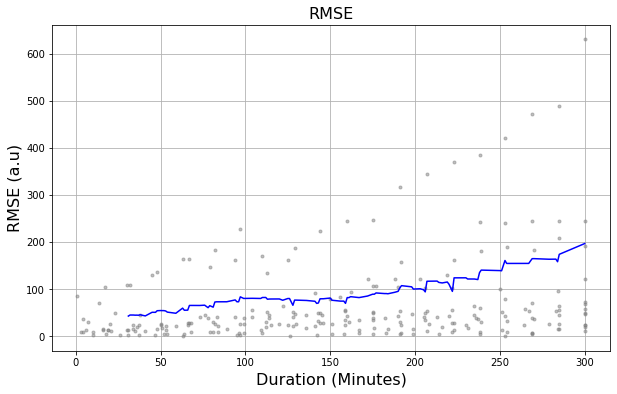

In [47]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.xlabel("Duration (Minutes)",{"Size":16})
plt.ylabel("RMSE (a.u)",{"Size":16})
plt.title("RMSE",{"Size":16})
#plt.legend()
plt.show()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


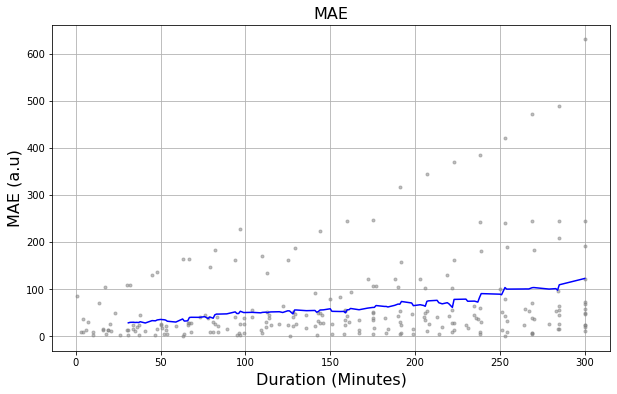

In [48]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')
plt.xlabel("Duration (Minutes)",{"Size":16})
plt.ylabel("MAE (a.u)",{"Size":16})
plt.title("MAE",{"Size":16})
#plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


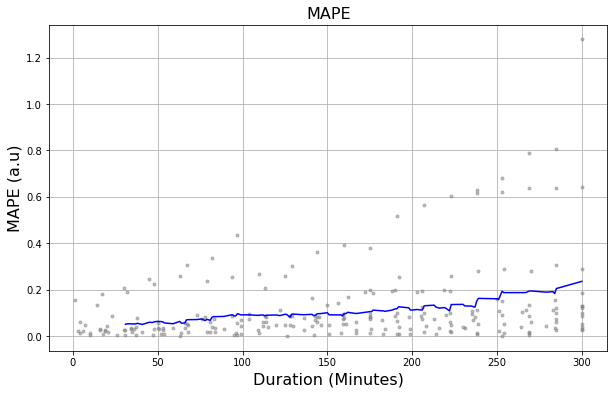

In [49]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.xlabel("Duration (Minutes)",{"Size":16})
plt.ylabel("MAPE (a.u)",{"Size":16})
plt.title("MAPE",{"Size":16})
#plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


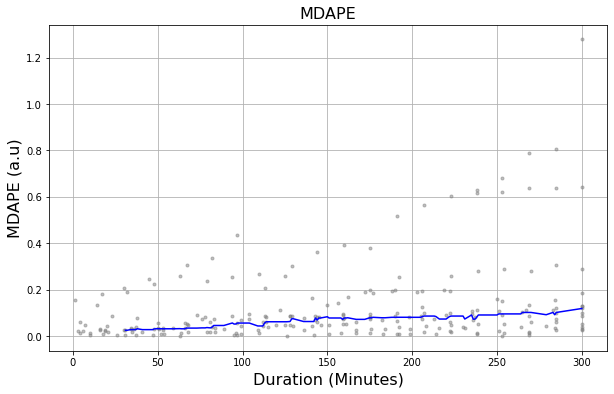

In [50]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')
plt.xlabel("Duration (Minutes)",{"Size":16})
plt.ylabel("MDAPE (a.u)",{"Size":16})
plt.title("MDAPE",{"Size":16})
#plt.legend()
plt.show()